In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [4]:
df.drop(["CustomerID"],axis="columns",inplace=True)

F:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


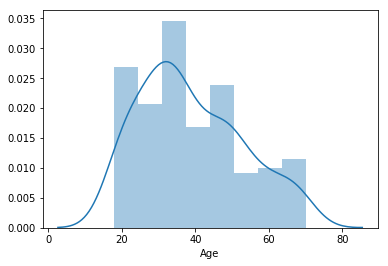

In [5]:
sns.distplot(df.Age)

In [6]:
sns.displot(df["Annual Income (k$)"])

AttributeError: module 'seaborn' has no attribute 'displot'

F:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


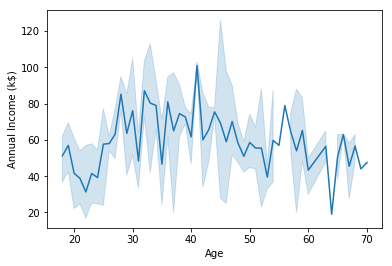

In [7]:
sns.lineplot(df.Age,df["Annual Income (k$)"])

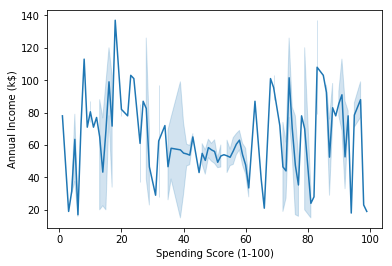

In [8]:
sns.lineplot(df["Spending Score (1-100)"],df["Annual Income (k$)"])

In [9]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [10]:
df.isnull().any()

Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [11]:
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

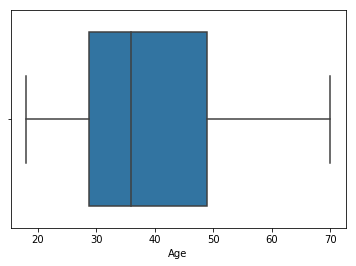

In [12]:
sns.boxplot(df.Age)

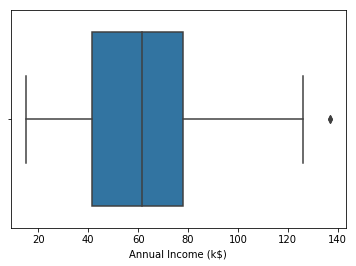

In [13]:
sns.boxplot(df["Annual Income (k$)"])

In [14]:
a=df["Annual Income (k$)"].quantile(0.99)
a

126.1099999999999

In [15]:
df["Annual Income (k$)"]=np.where(df["Annual Income (k$)"]>=a,df["Annual Income (k$)"].median(),df["Annual Income (k$)"])

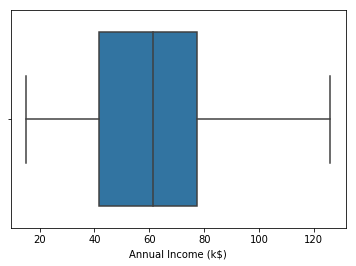

In [16]:
sns.boxplot(df["Annual Income (k$)"])

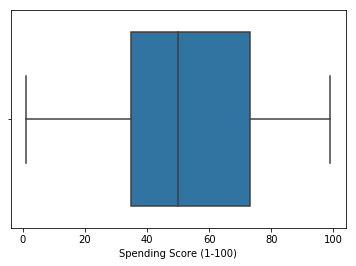

In [17]:
sns.boxplot(df["Spending Score (1-100)"])

In [18]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df.Gender=le.fit_transform(df.Gender)

In [19]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15.0,39
1,1,21,15.0,81
2,0,20,16.0,6
3,0,23,16.0,77
4,0,31,17.0,40


In [20]:
from sklearn.preprocessing import scale
df=pd.DataFrame(scale(df),columns=df.columns)

F:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by the scale function.
  


In [21]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.128152,-1.424569,-1.788777,-0.434801
1,1.128152,-1.281035,-1.788777,1.195704
2,-0.886405,-1.352802,-1.748853,-1.715913
3,-0.886405,-1.137502,-1.748853,1.040418
4,-0.886405,-0.563369,-1.708930,-0.395980


In [22]:
from sklearn.cluster import KMeans
model=KMeans(n_clusters=2)
model

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [23]:
KMeans(n_clusters=2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [24]:
y_predicted=model.fit_predict(df)
y_predicted

array([0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0])

In [25]:
df["clusters"]=y_predicted
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters
0,1.128152,-1.424569,-1.788777,-0.434801,0
1,1.128152,-1.281035,-1.788777,1.195704,0
2,-0.886405,-1.352802,-1.748853,-1.715913,1
3,-0.886405,-1.137502,-1.748853,1.040418,0
4,-0.886405,-0.563369,-1.708930,-0.395980,0
5,-0.886405,-1.209269,-1.708930,1.001596,0
6,-0.886405,-0.276302,-1.669006,-1.715913,1
7,-0.886405,-1.137502,-1.669006,1.700384,0
8,1.128152,1.804932,-1.629082,-1.832378,1
9,-0.886405,-0.635135,-1.629082,0.846310,0


In [26]:
x=df.drop("clusters",axis="columns")
x

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.128152,-1.424569,-1.788777,-0.434801
1,1.128152,-1.281035,-1.788777,1.195704
2,-0.886405,-1.352802,-1.748853,-1.715913
3,-0.886405,-1.137502,-1.748853,1.040418
4,-0.886405,-0.563369,-1.708930,-0.395980
5,-0.886405,-1.209269,-1.708930,1.001596
6,-0.886405,-0.276302,-1.669006,-1.715913
7,-0.886405,-1.137502,-1.669006,1.700384
8,1.128152,1.804932,-1.629082,-1.832378
9,-0.886405,-0.635135,-1.629082,0.846310


In [27]:
y=df.clusters
y

0      0
1      0
2      1
3      0
4      0
5      0
6      1
7      0
8      1
9      0
10     1
11     0
12     1
13     0
14     1
15     0
16     1
17     0
18     1
19     0
20     1
21     0
22     1
23     0
24     1
25     0
26     1
27     0
28     1
29     0
      ..
170    1
171    0
172    1
173    0
174    1
175    0
176    1
177    0
178    1
179    0
180    1
181    0
182    1
183    0
184    1
185    0
186    1
187    0
188    1
189    0
190    1
191    0
192    1
193    0
194    1
195    0
196    1
197    0
198    1
199    0
Name: clusters, Length: 200, dtype: int32

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=23)

In [29]:
x_train.shape

(160, 4)

In [30]:
x_test.shape

(40, 4)

In [31]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [32]:
lr.fit(x_train,y_train)

F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [33]:
lr.score(x_test,y_test)

1.0

In [34]:
lr.score(x_train,y_train)

1.0

In [35]:
from sklearn.metrics import confusion_matrix
y_pred = lr.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[19,  0],
       [ 0, 21]], dtype=int64)

Text(33.0, 0.5, 'Truth')

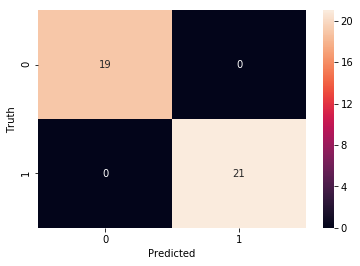

In [36]:
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        21

   micro avg       1.00      1.00      1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

